<a href="https://colab.research.google.com/github/Stamby22/DSCZ9_final_project/blob/main/Project_SDA_Butterflies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SDA Butterflies classification


*   download data
*   gathering requirements
*   data visualization
*   data processing




## About Dataset

We use the dataset https://www.kaggle.com/datasets/chris565/butterflies-austria-20/code


This is the butterflies images Dataset.In this dataset there are 20 different species of butterflies living in Austria.

The dataset consits of over 7000 butterflies and every class consists of 300-500 species.

This Dataset consists of folder as butterflies and species csv file.

The butterflies folder further contains two folder: Train folder and val folder.

The Train and Val Folder further contains several folders of images.

There are 20 Number of files in Training Folder and 20 Number of Files in the Validation Folder.

## Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_5_20.zip -d /content/Datasets


Archive:  /content/drive/MyDrive/Datasets/Butterflies_Austria_5_20.zip
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-001.jpg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-002.jpg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-003.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-004.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-006.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-007.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-008.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/trai

### Zobrazení Species.csv

In [12]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.regularizers import l1, l2

import tensorflow as tf

In [10]:
df=pd.read_csv("/content/Datasets/Butterflies_Austria_5_20/species_5.csv")
df#.head()

,num,abk,gname,latin
0,1,ad,Admiral,Vanessa Atalanta
1,2,ap,Apollo,Parnassius Apollo
2,3,af,Aurora,Anthocharis Cardamines
3,4,bl,Blaeuling,Lycaenidae
4,5,cf,C-Falter,Polygonia C-album


In [13]:
dataset_dir = "/content/Datasets/Butterflies_Austria_5_20/"
train_dir = os.path.join(dataset_dir, "butterflies", "train")
val_dir = os.path.join(dataset_dir, "butterflies", "val")

# Define the path to your dataset directory
dataset_path = '/kaggle/input/butterflies-austria-20'


In [14]:
num_train_files = len(os.listdir(train_dir))
print(f"Number of files in the 'train' folder: {num_train_files}")

num_val_files = len(os.listdir(val_dir))
print(f"Number of files in the 'val' folder: {num_val_files}")

Number of files in the 'train' folder: 5
Number of files in the 'val' folder: 5


In [18]:
# Count images per folder in training data
def count_images_per_folder(data_path):
    folders = os.listdir(data_path)
    folders.sort()
    folder_counts = {}
    for folder in folders:
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            folder_counts[folder] = num_images
    return folder_counts

# Vypíše počet obrázků v jednotlivých složkách train_dir
train_folder_counts = count_images_per_folder(train_dir)
print("Number of images in each folder of Training Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images")

# Vypíše počet obrázků v jednotlivých složkách val_dir
train_folder_counts = count_images_per_folder(val_dir)
print("\nNumber of images in each folder of Validation Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images")

Number of images in each folder of Training Data:
ad: 24 images
af: 24 images
ap: 24 images
bl: 24 images
cf: 24 images

Number of images in each folder of Validation Data:
ad: 12 images
af: 14 images
ap: 13 images
bl: 13 images
cf: 12 images


## Show images

### Functions definitions

In [20]:
from PIL import Image

def display_image(image_path, title=""):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_images_with_titles(image_paths, titles):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

def display_images_with_titles_II(image_paths, titles):
    """
    Displays multiple images with titles in a single plot.

    Args:
        image_paths: A list of paths to the images.
        titles: A list of titles corresponding to the images.
    """
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize as needed

    for i in range(num_images):
        image = plt.imread(image_paths[i])
        axes[i].imshow(image)
        axes[i].set_title(titles[i])
        axes[i].axis('off')  # Remove axis labels

    plt.tight_layout()
    plt.show()

Number of images displayed: prvních 10


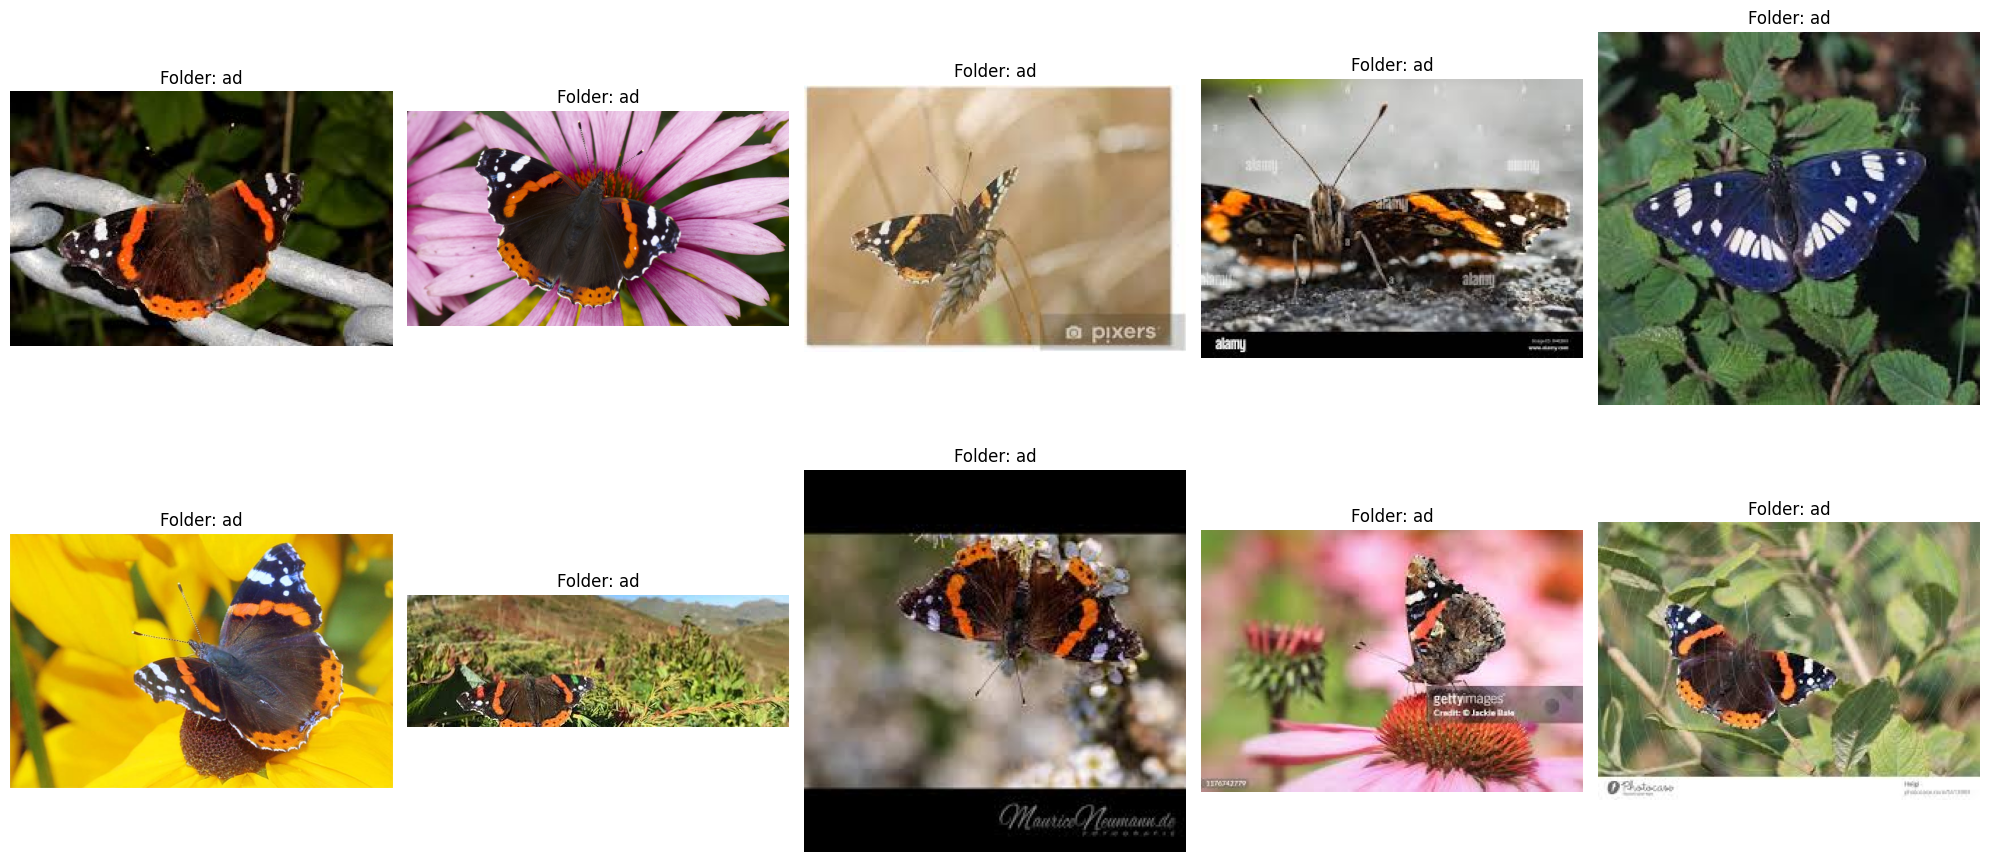

In [21]:
# Zobrazení prvních 10 obrázků prvního druhu

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for i, image_file in enumerate(image_files):
        if train_images_displayed < 10:
            image_path = os.path.join(folder_path, image_file)
            train_image_paths.append(image_path)
            train_image_titles.append(f"Folder: {folder}")
            train_images_displayed += 1
        else:
            break

print(f"Number of images displayed: prvních {train_images_displayed}")
display_images_with_titles(train_image_paths, train_image_titles)


 Images of each Folder of Training Data::


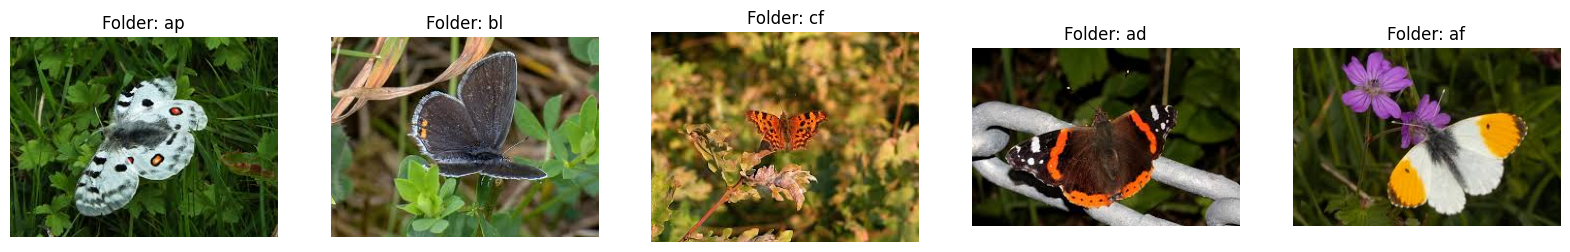


 Images of each folder of Validation Data::


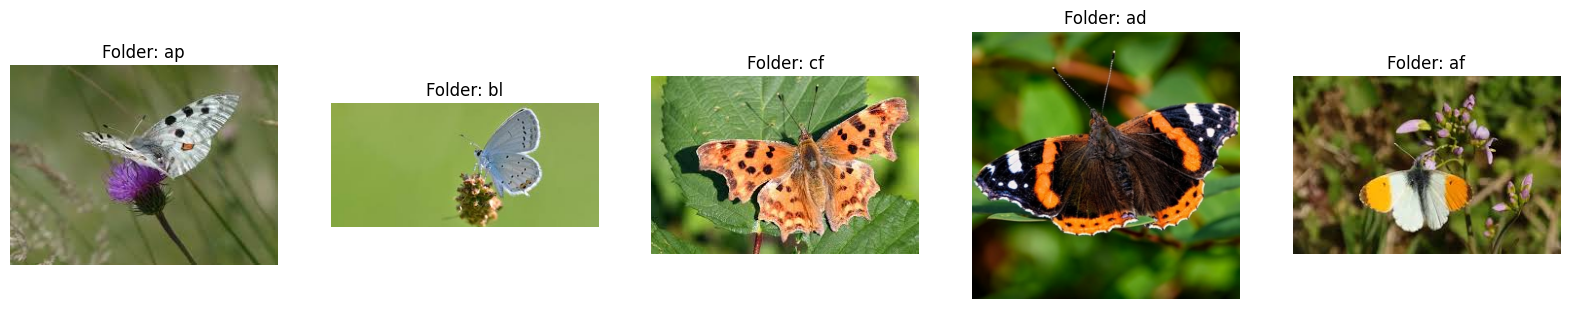

In [27]:
# Function to print bold headings
def print_bold_heading(heading):
    print(f"\n \033[1m{heading}:\033[0m")

# Display 10 images from each folder in the train folder
print_bold_heading("Images of each Folder of Training Data:")
train_folders = os.listdir(train_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(train_folders[:10]):
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

# Display 10 images from each folder in the validation folder
print_bold_heading("Images of each folder of Validation Data:")
val_folders = os.listdir(val_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(val_folders[:10]):
    folder_path = os.path.join(val_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

## Model

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load species CSV
df = pd.read_csv("/content/Datasets/Butterflies_Austria_5_20/species_5.csv")

# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/Datasets/Butterflies_Austria_5_20/butterflies/train',
        target_size=(224, 224),
        #batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/Datasets/Butterflies_Austria_5_20/butterflies/val',
        target_size=(224, 224),
        #batch_size=32,
        class_mode='categorical')


Found 119 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


In [36]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [37]:
base_model.input_shape

(None, 224, 224, 3)

In [40]:
# Unfreeze some layers in the base model
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [42]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=5,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      #callbacks=[early_stopping],
      class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 202s 56s/step - accuracy: 0.5977 - loss: 1.2613 - val_accuracy: 0.2344 - val_loss: 1.8436
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 136s 37s/step - accuracy: 0.5315 - loss: 1.1446 - val_accuracy: 0.2812 - val_loss: 1.9298
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 40s/step - accuracy: 0.5677 - loss: 1.0748 - val_accuracy: 0.2812 - val_loss: 2.1851
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 176s 53s/step - accuracy: 0.7605 - loss: 0.6827 - val_accuracy: 0.3594 - val_loss: 2.2543
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 137s 37s/step - accuracy: 0.7789 - loss: 0.6074 - val_accuracy: 0.2969 - val_loss: 2.1608
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 19s/step - accuracy: 0.2812 - loss: 2.2983
Validation Accuracy: 0.296875


In [43]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

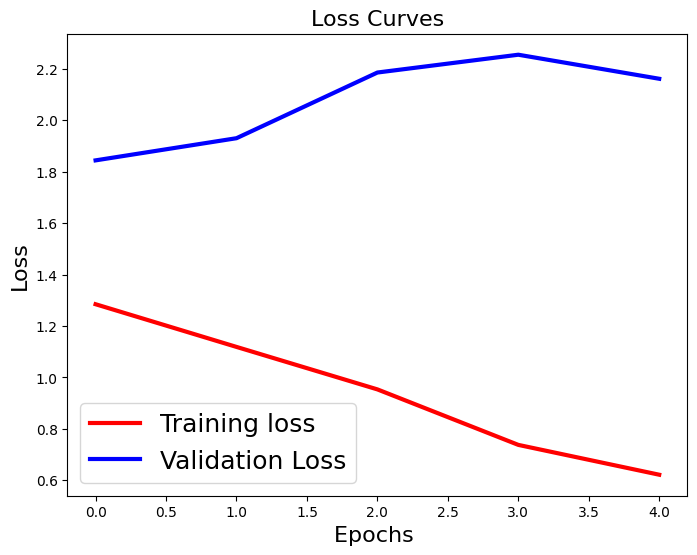

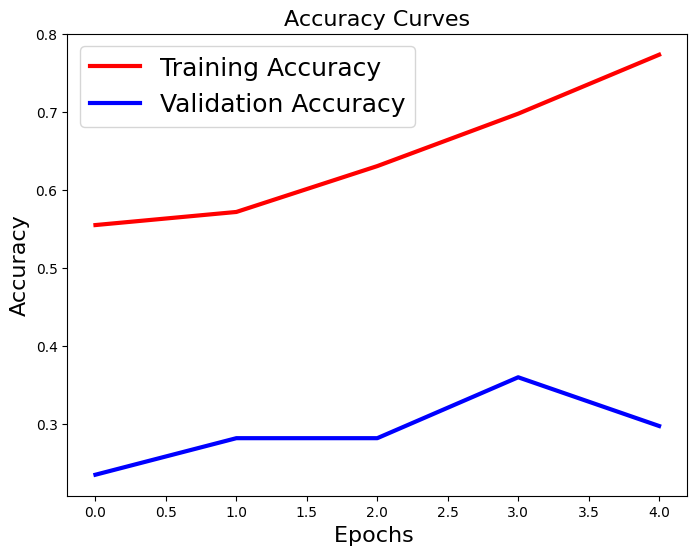

In [44]:
plot_history(history)

## Save model during the training


In [46]:
model.save("Butterflies_VGG16.keras")

In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,417,937 (257.18 MB)

 Trainable params: 19,927,557 (76.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 39,855,116 (152.04 MB)